# How does the function we are want to integrate behave
what does 

$$
\omega(R)\frac{\nu(r)\sigma^2_r(r)}{\sqrt{r^2 - R^2}}\left (1 - \beta\frac{R^2}{r^2}\right )rR
$$

in

$$
\left \langle  \sigma^2_*\right \rangle = \frac{2\int_0^{\infty}\int_R^{\infty}\omega(R)\frac{\nu(r)\sigma^2_r(r)}{\sqrt{r^2 - R^2}}\left (1 - \beta\frac{R^2}{r^2}\right )rdrRdR}{\int_0^{\infty}\int_R^{\infty}\omega(R)\frac{2\nu(r)}{\sqrt{r^2 - R^2}}rdrRdR}
$$

looks like?

In [1]:
### libraries
import sys

sys.path.append('../')

import Velocity_dispersion
import rings2cosmo
import pandas as pd
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import seaborn

from astropy import constants as const
from astropy import units as u
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0 = 67.3, Om0 = 0.315)

In [2]:
## importing cao object for tests
data = pd.read_csv('../data/sample80.csv')
data.head()

,name,zl,zs,sigma_0,dsigma_0,theta_E,theta_ap,sigma_atm,sigma_ap,d_sigma_ap
0,J2321-0939,0.082,0.532,246,8,1.60,1.5,1.4,249,8
1,J1106+5228,0.096,0.407,268,13,1.23,1.5,1.4,262,13
2,J1143-0144,0.106,0.402,264,13,1.68,1.5,1.4,269,13
3,J0841+3824,0.116,0.657,222,11,1.41,1.5,1.4,225,11
4,J0044+0113,0.120,0.196,267,13,0.79,1.5,1.4,266,13


In [3]:
i = 0
z_L = data['zl'][i]
z_S = data['zs'][i]
theta_E = (data['theta_E'].values * u.arcsec).to(u.rad)[i].value
theta_ap = (data['theta_ap'].values * u.arcsec).to(u.rad)[i].value
seeing_atm = (data['sigma_atm'].values * u.arcsec).to(u.rad)[i].value
velDisp = data['sigma_ap'][i]
velDispErr = data['d_sigma_ap'][i]
print(z_L, z_S, theta_E ,theta_ap, seeing_atm, velDisp, velDispErr)

0.082 0.532 7.757018897752577e-06 7.27220521664304e-06 6.787391535533504e-06 249 8


In [25]:
results = []
var = ('r', 'R', 'func')

alpha = 2.0
beta = 0.18
delta = 2.4
gamma = 1.0

npoints = 10
DL = cosmo.angular_diameter_distance(z_L).value
disc_R = np.linspace(0.00000001,DL*theta_E/100,num = npoints) 

for R in disc_R:
    spherical_r = np.linspace(R+0.00000001,DL*theta_E/90,num = npoints)
    
    for r in spherical_r:
        func = Velocity_dispersion.integrando(r, R, z_L,z_S,theta_E, seeing_atm, theta_ap, alpha, beta, delta,gamma)
        
        temp = (r, R, func)
        results.append (dict(zip(var,temp)))
        
df = pd.DataFrame(results)

In [18]:
pd.set_option('display.max_rows', 100)
df.shape[0]

10000

In [21]:
int(np.sqrt(df.shape[0])) == npoints

True

Text(0.5, 0, 'function')

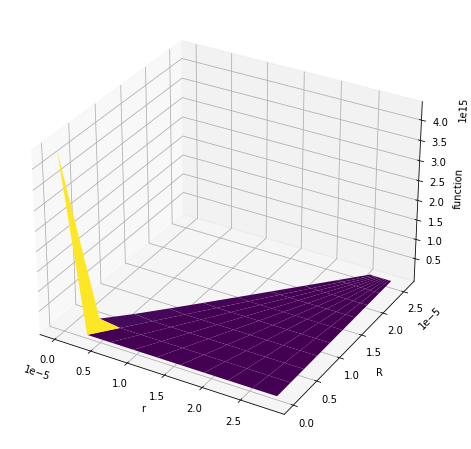

In [26]:
r = []
R = []
func = []
index = np.arange(0,df.shape[0], step = npoints)

for i in index:
    temp = df.loc[i:(i+npoints -1), 'r'].to_numpy()
    r.append(temp)
    
    temp = df.loc[i:(i+npoints -1), 'R'].to_numpy()
    R.append(temp)
    
    temp = df.loc[i:(i+npoints -1), 'func'].to_numpy()
    func.append(temp)

#print(test)
#print(func)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(np.asarray(r), np.asarray(R), np.asarray(func), rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('r')
ax.set_ylabel('R')
ax.set_zlabel('function')
